In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

%matplotlib inline
sns.set_style("whitegrid")

In [72]:
train=pd.read_csv('train_values.csv', low_memory=False)
labels=pd.read_csv('train_labels.csv', low_memory=False)

In [73]:
union=train.merge(labels, how='inner', on='building_id')
union.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [74]:
df2=union.rename(columns={'has_superstructure_adobe_mud':'adobe-barro',
                   'has_superstructure_mud_mortar_stone':'barro-piedra',
                   'has_superstructure_stone_flag':'piedra',
                   'has_superstructure_cement_mortar_stone':'cemento-piedra',
                   'has_superstructure_mud_mortar_brick':'barro-ladrillo',
                   'has_superstructure_cement_mortar_brick':'cemento-ladrillos',
                   'has_superstructure_timber':'Timber',
                   'has_superstructure_bamboo':'Bambú',
                   'has_superstructure_rc_non_engineered':'concreto_reforzado_no_diseñado',
                   'has_superstructure_rc_engineered':'concreto_reforzado_diseñado',
                   'has_superstructure_other':'estructura_otro',
                   'has_secondary_use':'uso_secundario',
                   'has_secondary_use_agriculture':'uso_agricultura',
                   'has_secondary_use_hotel':'uso_hotel',
                   'has_secondary_use_rental':'uso_rental',
                    'has_secondary_use_institution':'uso_institucion',
                    'has_secondary_use_school':'uso_escuela',
                    'has_secondary_use_industry':'uso_industrial',
                    'has_secondary_use_health_post':'uso_PuestoDeSalud',
                    'has_secondary_use_gov_office':'uso_oficinaDeGobierno',
                    'has_secondary_use_use_police':'uso_estacionDePolicia',
                    'has_secondary_use_other':'uso_de_otros'})

## Analisis material de construccion 

### <font color =blue> ***1. ¿Cual es el material que mas abunda?*** </font>

In [75]:
materiales=df2.loc[:,['adobe-barro','barro-piedra','piedra','cemento-piedra','barro-ladrillo','cemento-ladrillos',
                      'Timber','Bambú','concreto_reforzado_no_diseñado','concreto_reforzado_diseñado','estructura_otro']]

In [76]:
grupo2=materiales.agg(['sum','mean'])
grupo2.T

,sum,mean
adobe-barro,23101.0,0.088645
barro-piedra,198561.0,0.761935
piedra,8947.0,0.034332
cemento-piedra,4752.0,0.018235
barro-ladrillo,17761.0,0.068154
cemento-ladrillos,19615.0,0.075268
Timber,66450.0,0.254988
Bambú,22154.0,0.085011
concreto_reforzado_no_diseñado,11099.0,0.042590
concreto_reforzado_diseñado,4133.0,0.015859


In [77]:
grupo2.T.dtypes

sum     float64
mean    float64
dtype: object

Text(0.5, 1.0, 'Cantidad de Materiales')

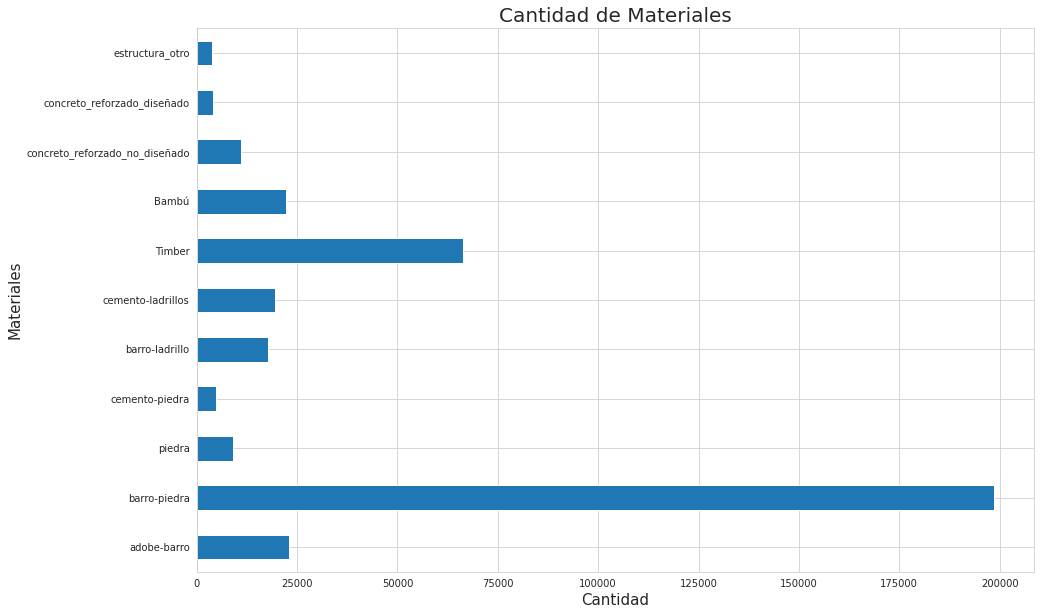

In [78]:
cant_materiales=materiales.agg('sum')

visua= cant_materiales.T.plot.barh(figsize=(15,10))
visua.set_xlabel("Cantidad", fontsize=15)
visua.set_ylabel("Materiales", fontsize=15)
visua.set_title('Cantidad de Materiales', fontsize = 20)


### <font color =blue> ***2. ¿Cual es el material que mas daño sufrio y que grado tuvo?*** </font>



In [79]:
daños_de_materiales=df2.loc[:,['damage_grade','adobe-barro','barro-piedra','piedra','cemento-piedra','barro-ladrillo','cemento-ladrillos',
                      'Timber','Bambú','concreto_reforzado_no_diseñado','concreto_reforzado_diseñado','estructura_otro']]
agrupo=daños_de_materiales.groupby('damage_grade').sum()
agrupo

,adobe-barro,barro-piedra,piedra,cemento-piedra,barro-ladrillo,cemento-ladrillos,Timber,Bambú,concreto_reforzado_no_diseñado,concreto_reforzado_diseñado,estructura_otro
damage_grade,,,,,,,,,,,
1,594,8760,182,829,623,7105,7642,2839,3857,2656,656
2,13902,113947,4534,3248,11698,11421,40187,14001,5832,1402,2248
3,8605,75854,4231,675,5440,1089,18621,5314,1410,75,1001


In [80]:
agrupoT=agrupo.T
agrupoT

damage_grade,1,2,3
adobe-barro,594,13902,8605
barro-piedra,8760,113947,75854
piedra,182,4534,4231
cemento-piedra,829,3248,675
barro-ladrillo,623,11698,5440
cemento-ladrillos,7105,11421,1089
Timber,7642,40187,18621
Bambú,2839,14001,5314
concreto_reforzado_no_diseñado,3857,5832,1410
concreto_reforzado_diseñado,2656,1402,75


Text(0.5, 1.0, 'Daño de los distintos Materiales')

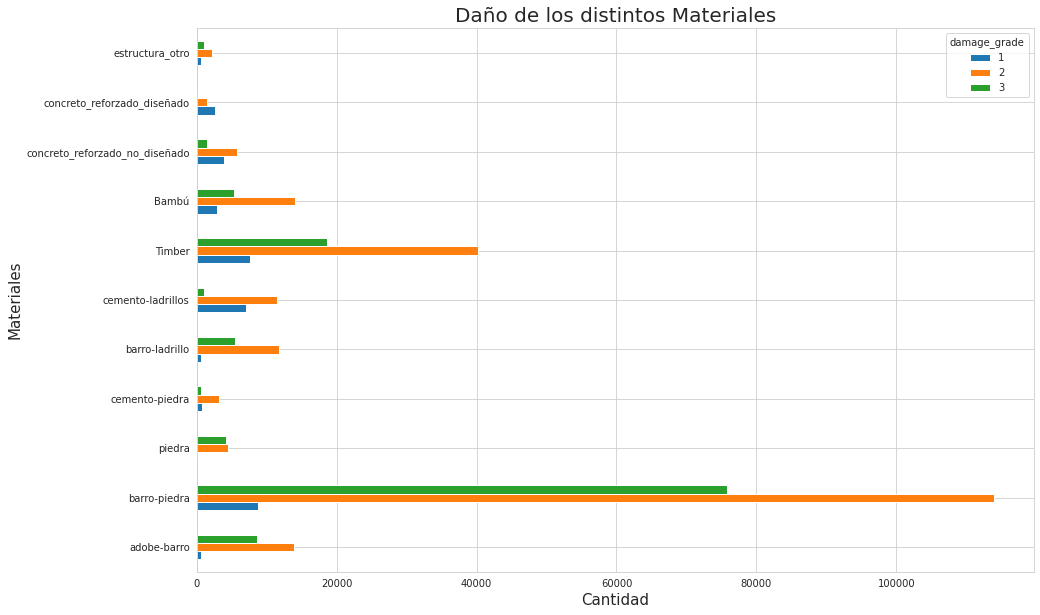

In [81]:
visua2= agrupoT.plot.barh(figsize=(15,10))
visua2.set_xlabel("Cantidad", fontsize=15)
visua2.set_ylabel("Materiales", fontsize=15)
visua2.set_title('Daño de los distintos Materiales', fontsize = 20)

## Anailsis de Edificios

### <font color =blue> ***3.¿Que tipo de edificios existe?*** </font>


In [82]:
df2.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'adobe-barro', 'barro-piedra', 'piedra',
       'cemento-piedra', 'barro-ladrillo', 'cemento-ladrillos', 'Timber',
       'Bambú', 'concreto_reforzado_no_diseñado',
       'concreto_reforzado_diseñado', 'estructura_otro',
       'legal_ownership_status', 'count_families', 'uso_secundario',
       'uso_agricultura', 'uso_hotel', 'uso_rental', 'uso_institucion',
       'uso_escuela', 'uso_industrial', 'uso_PuestoDeSalud',
       'uso_oficinaDeGobierno', 'uso_estacionDePolicia', 'uso_de_otros',
       'damage_grade'],
      dtype='object')

In [83]:
edificios=df2.loc[:,['uso_secundario','uso_agricultura', 'uso_hotel', 'uso_rental', 'uso_institucion','uso_escuela', 
                     'uso_industrial', 'uso_PuestoDeSalud','uso_oficinaDeGobierno', 'uso_estacionDePolicia', 'uso_de_otros']]
cantidadDeEdificios=edificios.agg(['sum','mean'])
cantidadDeEdificios.T

,sum,mean
uso_secundario,29156.0,0.111880
uso_agricultura,16777.0,0.064378
uso_hotel,8763.0,0.033626
uso_rental,2111.0,0.008101
uso_institucion,245.0,0.000940
uso_escuela,94.0,0.000361
uso_industrial,279.0,0.001071
uso_PuestoDeSalud,49.0,0.000188
uso_oficinaDeGobierno,38.0,0.000146
uso_estacionDePolicia,23.0,0.000088


Text(0.5, 1.0, 'Cantidad de Edificios')

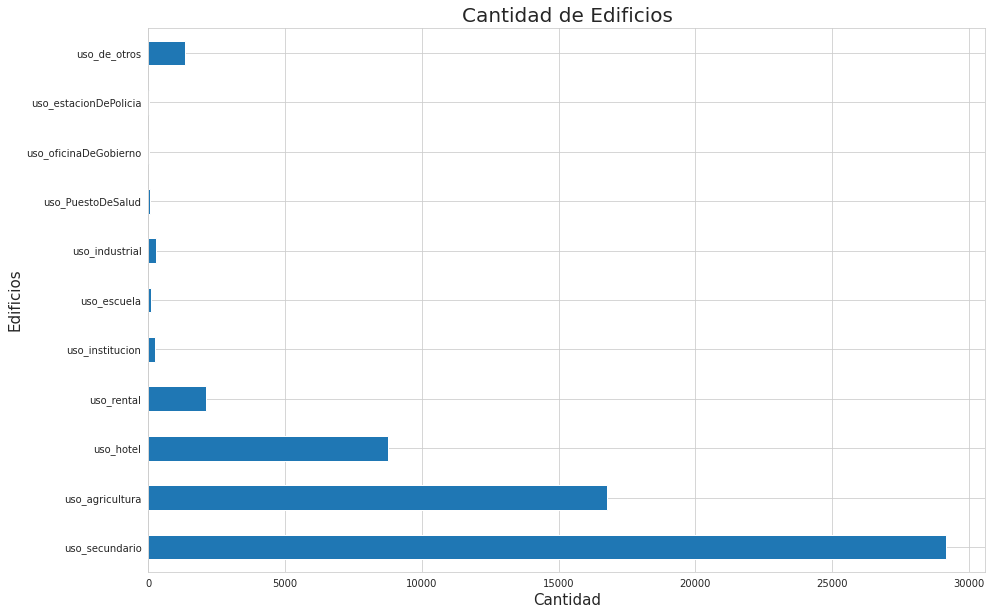

In [84]:
cant_edificios=edificios.agg('sum')

visua= cant_edificios.T.plot.barh(figsize=(15,10))
visua.set_xlabel("Cantidad", fontsize=15)
visua.set_ylabel("Edificios", fontsize=15)
visua.set_title('Cantidad de Edificios', fontsize = 20)


### <font color =blue> ***4.¿Esos edificios de que material son?*** </font>

## Analisis de edificios con mayor destruccion 

### <font color =blue> ***5.¿Cual fue el edificio que mayor destruccion tuvo?*** </font>

In [85]:
mayor_danio = df2.loc[:,['count_floors_pre_eq', 'position', 'adobe-barro',\
                         'barro-piedra', 'piedra', 'cemento-piedra',\
                         'barro-ladrillo', 'cemento-ladrillos', 'Timber',\
                         'Bambú', 'concreto_reforzado_no_diseñado',\
                         'concreto_reforzado_diseñado', 'estructura_otro', 'damage_grade']]
mayor_danio = mayor_danio.rename(columns={'count_floors_pre_eq':'cantidad_pisos',\
                                         'damage_grade':'nivel_danio',\
                                         'position':'orientacion'})
mayor_danio = mayor_danio.loc[mayor_danio.nivel_danio == 3]
mayor_danio

,cantidad_pisos,orientacion,adobe-barro,barro-piedra,piedra,cemento-piedra,barro-ladrillo,cemento-ladrillos,Timber,Bambú,concreto_reforzado_no_diseñado,concreto_reforzado_diseñado,estructura_otro,nivel_danio
0,2,t,1,1,0,0,0,0,0,0,0,0,0,3
2,2,t,0,1,0,0,0,0,0,0,0,0,0,3
4,3,s,1,0,0,0,0,0,0,0,0,0,0,3
6,2,s,0,1,0,0,0,0,0,0,0,0,0,3
10,2,t,0,1,0,0,0,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260591,1,s,0,1,0,0,0,0,0,0,0,0,0,3
260595,2,s,0,1,0,0,0,0,0,0,0,0,0,3
260597,2,s,0,1,0,0,0,0,0,0,0,0,0,3
260598,3,s,0,1,0,0,0,0,0,0,0,0,0,3


### <font color =blue> ***5.1.¿Esos edificios de mayor destruccion de que material son y que cantidad de pisos tenian?*** </font>

In [86]:
cantidad_pisos = mayor_danio['cantidad_pisos'].value_counts()
cantidad_pisos

2    50062
3    24601
1    10674
4     1343
5      511
6       23
7        4
Name: cantidad_pisos, dtype: int64

Text(0, 0.5, 'Cantidad de edificios')

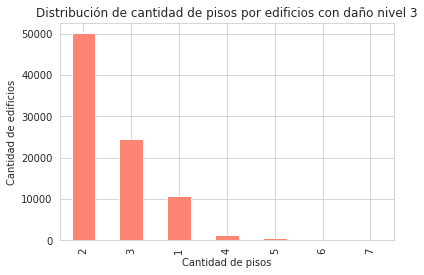

In [87]:
g = cantidad_pisos.plot.bar(color='#ff8474')
g.set_title('Distribución de cantidad de pisos por edificios con daño nivel 3')
g.set_xlabel('Cantidad de pisos')
g.set_ylabel('Cantidad de edificios')

In [88]:
materiales_danio = mayor_danio.drop('cantidad_pisos', 1)
materiales_danio = materiales_danio.drop('nivel_danio', 1)
materiales_danio = materiales_danio.drop('orientacion', 1)
materiales_danio = materiales_danio.sum()
materiales_danio

adobe-barro                        8605
barro-piedra                      75854
piedra                             4231
cemento-piedra                      675
barro-ladrillo                     5440
cemento-ladrillos                  1089
Timber                            18621
Bambú                              5314
concreto_reforzado_no_diseñado     1410
concreto_reforzado_diseñado          75
estructura_otro                    1001
dtype: int64

Text(0, 0.5, 'Cantidad de edificios')

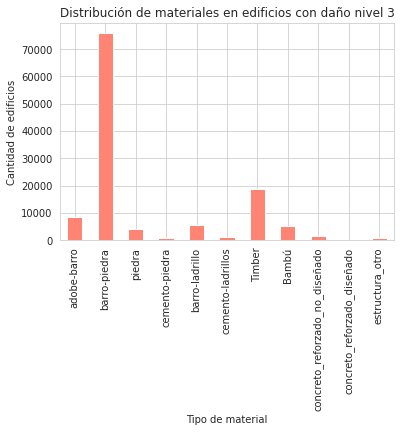

In [89]:
g = materiales_danio.plot.bar(color='#ff8474')
g.set_title('Distribución de materiales en edificios con daño nivel 3')
g.set_xlabel('Tipo de material')
g.set_ylabel('Cantidad de edificios')

In [90]:
materiales_danio_sin_barro_piedra = mayor_danio.drop('cantidad_pisos', 1)
materiales_danio_sin_barro_piedra = materiales_danio_sin_barro_piedra.drop('nivel_danio', 1)
materiales_danio_sin_barro_piedra = materiales_danio_sin_barro_piedra.drop('barro-piedra', 1)
materiales_danio_sin_barro_piedra = materiales_danio_sin_barro_piedra.drop('orientacion', 1)
materiales_danio_sin_barro_piedra = materiales_danio_sin_barro_piedra.sum()
materiales_danio_sin_barro_piedra

adobe-barro                        8605
piedra                             4231
cemento-piedra                      675
barro-ladrillo                     5440
cemento-ladrillos                  1089
Timber                            18621
Bambú                              5314
concreto_reforzado_no_diseñado     1410
concreto_reforzado_diseñado          75
estructura_otro                    1001
dtype: int64

Text(0, 0.5, 'Cantidad de edificios')

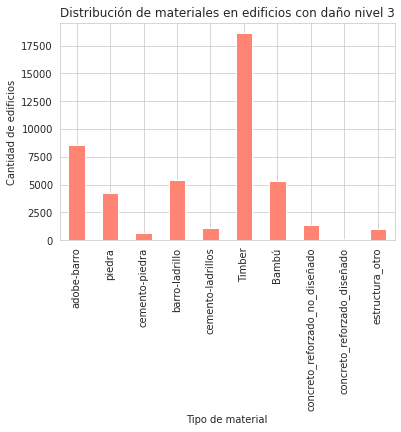

In [91]:
g = materiales_danio_sin_barro_piedra.plot.bar(color='#ff8474')
g.set_title('Distribución de materiales en edificios con daño nivel 3')
g.set_xlabel('Tipo de material')
g.set_ylabel('Cantidad de edificios')

### <font color =blue> ***5.2.¿Influye en algo la orientacion?*** </font>

In [92]:
orientacion = mayor_danio['orientacion'].value_counts()
orientacion

s    66172
t    16734
j     3708
o      604
Name: orientacion, dtype: int64

Text(0, 0.5, 'Cantidad de edificios')

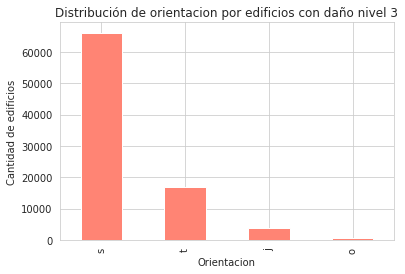

In [93]:
g = orientacion.plot.bar(color='#ff8474')
g.set_title('Distribución de orientacion por edificios con daño nivel 3')
g.set_xlabel('Orientacion')
g.set_ylabel('Cantidad de edificios')

### <font color =blue> ***5.3.¿Influye el tipo de base de piso o techo que tienen?*** </font>

In [94]:
# Parte del análisis hecho en Generalidades esctructurales

## Analisis de edificios con menor destruccion 

### <font color =blue> ***6.¿Cual fue el edificio que menor destruccion sufrio ?*** </font>

In [95]:
menor_danio = df2.loc[:,['count_floors_pre_eq', 'position', 'adobe-barro',\
                         'barro-piedra', 'piedra', 'cemento-piedra',\
                         'barro-ladrillo', 'cemento-ladrillos', 'Timber',\
                         'Bambú', 'concreto_reforzado_no_diseñado',\
                         'concreto_reforzado_diseñado', 'estructura_otro', 'damage_grade']]
menor_danio = menor_danio.rename(columns={'count_floors_pre_eq':'cantidad_pisos',\
                                         'damage_grade':'nivel_danio',\
                                         'position':'orientacion'})
menor_danio = menor_danio.loc[menor_danio.nivel_danio == 1]
menor_danio

,cantidad_pisos,orientacion,adobe-barro,barro-piedra,piedra,cemento-piedra,barro-ladrillo,cemento-ladrillos,Timber,Bambú,concreto_reforzado_no_diseñado,concreto_reforzado_diseñado,estructura_otro,nivel_danio
7,2,s,0,0,0,0,0,1,1,0,0,0,0,1
9,1,s,0,0,0,0,0,1,0,0,0,0,0,1
36,2,s,0,1,0,0,0,0,0,0,0,0,0,1
45,1,t,0,0,0,0,0,0,0,0,1,0,0,1
49,1,s,0,1,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260541,1,s,0,1,0,0,0,0,0,0,0,0,0,1
260545,3,s,0,0,0,0,0,1,0,0,0,0,0,1
260557,1,s,0,0,0,0,0,1,0,0,0,0,0,1
260567,2,s,0,1,0,0,0,0,0,0,0,0,0,1


### <font color =blue> ***6.1.¿Esos edificios de menor destruccion de que material son y que cantidad de pisos tenian?*** </font>

In [96]:
cantidad_pisos_m = menor_danio['cantidad_pisos'].value_counts()
cantidad_pisos_m

2    12593
1     8969
3     2537
4      707
5      254
6       53
7       10
9        1
Name: cantidad_pisos, dtype: int64

Text(0, 0.5, 'Cantidad de edificios')

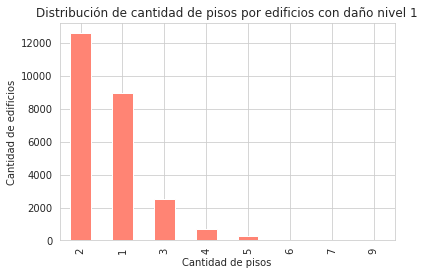

In [97]:
g = cantidad_pisos_m.plot.bar(color='#ff8474')
g.set_title('Distribución de cantidad de pisos por edificios con daño nivel 1')
g.set_xlabel('Cantidad de pisos')
g.set_ylabel('Cantidad de edificios')

In [98]:
materiales_danio_m = menor_danio.drop('cantidad_pisos', 1)
materiales_danio_m = materiales_danio_m.drop('nivel_danio', 1)
materiales_danio_m = materiales_danio_m.drop('orientacion', 1)
materiales_danio_m = materiales_danio_m.sum()
materiales_danio_m

adobe-barro                        594
barro-piedra                      8760
piedra                             182
cemento-piedra                     829
barro-ladrillo                     623
cemento-ladrillos                 7105
Timber                            7642
Bambú                             2839
concreto_reforzado_no_diseñado    3857
concreto_reforzado_diseñado       2656
estructura_otro                    656
dtype: int64

Text(0, 0.5, 'Cantidad de edificios')

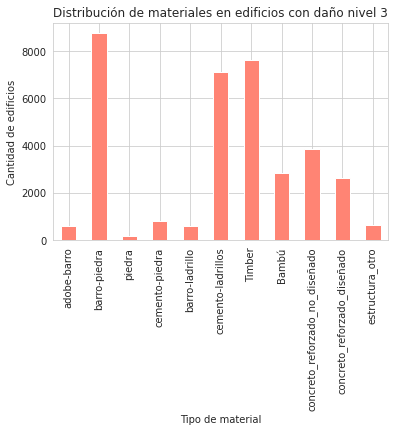

In [99]:
g = materiales_danio_m.plot.bar(color='#ff8474')
g.set_title('Distribución de materiales en edificios con daño nivel 3')
g.set_xlabel('Tipo de material')
g.set_ylabel('Cantidad de edificios')

### <font color =blue> ***6.2.¿Influye en algo la orientacion?*** </font>

In [100]:
orientacion_m = menor_danio['orientacion'].value_counts()
orientacion_m

s    19867
t     3462
j     1675
o      120
Name: orientacion, dtype: int64

Text(0, 0.5, 'Cantidad de edificios')

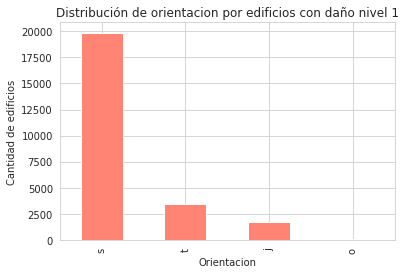

In [101]:
g = orientacion_m.plot.bar(color='#ff8474')
g.set_title('Distribución de orientacion por edificios con daño nivel 1')
g.set_xlabel('Orientacion')
g.set_ylabel('Cantidad de edificios')

### <font color =blue> ***6.3.¿Influye el tipo de base de piso o techo que tienen?*** </font>

In [102]:
# Parte del análisis hecho en Generalidades esctructurales 